In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset `indian_weather_data.csv` contains weather information for various Indian cities. It includes details such as city name, geographical coordinates (latitude and longitude), current temperature, weather code, sunrise and sunset times, moonrise and moonset times, atmospheric carbon monoxide (CO) levels, wind speed and direction, atmospheric pressure, precipitation, humidity, cloud cover, 'feels like' temperature, UV index, and visibility. While specific dates aren't shown in the head, columns like sunrise and sunset indicate daily weather observations.

In [ ]:
df = pd.read_csv('indian_weather_data.csv')

df.head()

,city,lat,lon,temperature,weather_code,sunrise,sunset,moonrise,moonset,co,...,wind_speed,wind_degree,wind_dir,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
0,New Delhi,28.600,77.200,21,143,07:05 AM,05:26 PM,01:04 AM,01:06 PM,1411.85,...,4,34,NE,1017,0.0,53,50,21,0,1
1,Mumbai,18.975,72.826,30,122,07:03 AM,06:03 PM,01:20 AM,01:29 PM,644.85,...,18,300,WNW,1011,0.0,35,0,32,0,4
2,Kolkata,22.570,88.370,21,143,06:07 AM,04:54 PM,12:16 AM,12:23 PM,457.85,...,8,3,N,1014,0.0,73,0,21,0,3
3,Chennai,13.083,80.283,26,143,06:22 AM,05:44 PM,12:48 AM,01:00 PM,275.85,...,19,31,NNE,1012,0.0,65,25,28,0,5
4,Bengaluru,12.983,77.583,24,113,06:32 AM,05:55 PM,12:59 AM,01:11 PM,243.85,...,9,76,ENE,1015,0.0,25,0,24,0,10


This cell performs an initial data inspection:
- It prints all column names to understand the available features.
- It displays a concise summary of the DataFrame, including data types and non-null values, using `df.info()`.
- It checks for any missing values in each column using `df.isnull().sum()`.

In [ ]:
print(df.columns)
print(df.info())

df.isnull().sum()

Index(['city', 'lat', 'lon', 'temperature', 'weather_code', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'co', 'no2', 'o3', 'so2', 'pm2_5',
       'pm10', 'wind_speed', 'wind_degree', 'wind_dir', 'pressure', 'precip',
       'humidity', 'cloudcover', 'feelslike', 'uv_index', 'visibility'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          74 non-null     object 
 1   lat           74 non-null     float64
 2   lon           74 non-null     float64
 3   temperature   74 non-null     int64  
 4   weather_code  74 non-null     int64  
 5   sunrise       74 non-null     object 
 6   sunset        74 non-null     object 
 7   moonrise      74 non-null     object 
 8   moonset       74 non-null     object 
 9   co            74 non-null     float64
 10  no2           74 non-null     float64
 11  o3            

,0
city,0
lat,0
lon,0
temperature,0
weather_code,0
sunrise,0
sunset,0
moonrise,0
moonset,0
co,0


The dataset contains 25 columns covering various weather and atmospheric parameters like city, temperature, wind, pressure, humidity, and air quality metrics (CO, NO2, O3, SO2, PM2.5, PM10). All columns are fully populated, with no missing values, as indicated by `df.isnull().sum()`.

This cell selects a subset of relevant columns from the original DataFrame, focusing on city, pollutant levels, and key weather parameters. The cleaned DataFrame is then saved to a new CSV file named `cleaned_air_quality_weather.csv` in the current directory, and the first few rows of the updated DataFrame are displayed.

In [ ]:
columns_to_keep = ['city', 'co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
                   'temperature', 'humidity', 'wind_speed', 'uv_index', 'precip']
df = df[columns_to_keep]
df.to_csv("cleaned_air_quality_weather.csv", index=False)
df

,city,co,no2,o3,so2,pm2_5,pm10,temperature,humidity,wind_speed,uv_index,precip
0,New Delhi,1411.85,23.95,264,76.65,137.25,140.05,21,53,4,0,0.0
1,Mumbai,644.85,25.55,209,31.15,46.65,47.05,30,35,18,0,0.0
2,Kolkata,457.85,1.95,214,12.95,44.55,47.25,21,73,8,0,0.0
3,Chennai,275.85,2.05,135,7.55,28.75,35.15,26,65,19,0,0.0
4,Bengaluru,243.85,3.85,152,10.75,20.95,26.35,24,25,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Solapur,265.85,2.15,179,14.15,20.45,21.55,31,22,10,0,0.0
70,Kolhapur,282.85,2.45,171,16.05,20.25,21.25,27,20,6,0,0.0
71,Sangli,331.85,18.45,39,23.35,9.75,10.25,-1,74,16,0,0.0
72,Satara,233.85,1.45,164,9.95,16.75,17.25,23,28,7,0,0.0


This cell mounts Google Drive to enable saving files to a persistent storage location. It then creates a specific folder structure (`/content/drive/MyDrive/DS_Projects`) if it doesn't already exist and saves the `cleaned_air_quality_weather.csv` file into this Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Folder path
folder_path = '/content/drive/MyDrive/DS_Projects'

# Create folder if it doesn’t exist
os.makedirs(folder_path, exist_ok=True)

file_path = folder_path + '/cleaned_air_quality_weather.csv'
df.to_csv(file_path, index=False)
print(f"Saved to {file_path}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved to /content/drive/MyDrive/DS_Projects/cleaned_air_quality_weather.csv


**City-wise pollutant distributions**

This cell generates box plots to visualize the distribution of each pollutant ('co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10') across different cities. Each plot shows the median, quartiles, and potential outliers for a specific pollutant, allowing for city-wise comparison of air quality metrics.

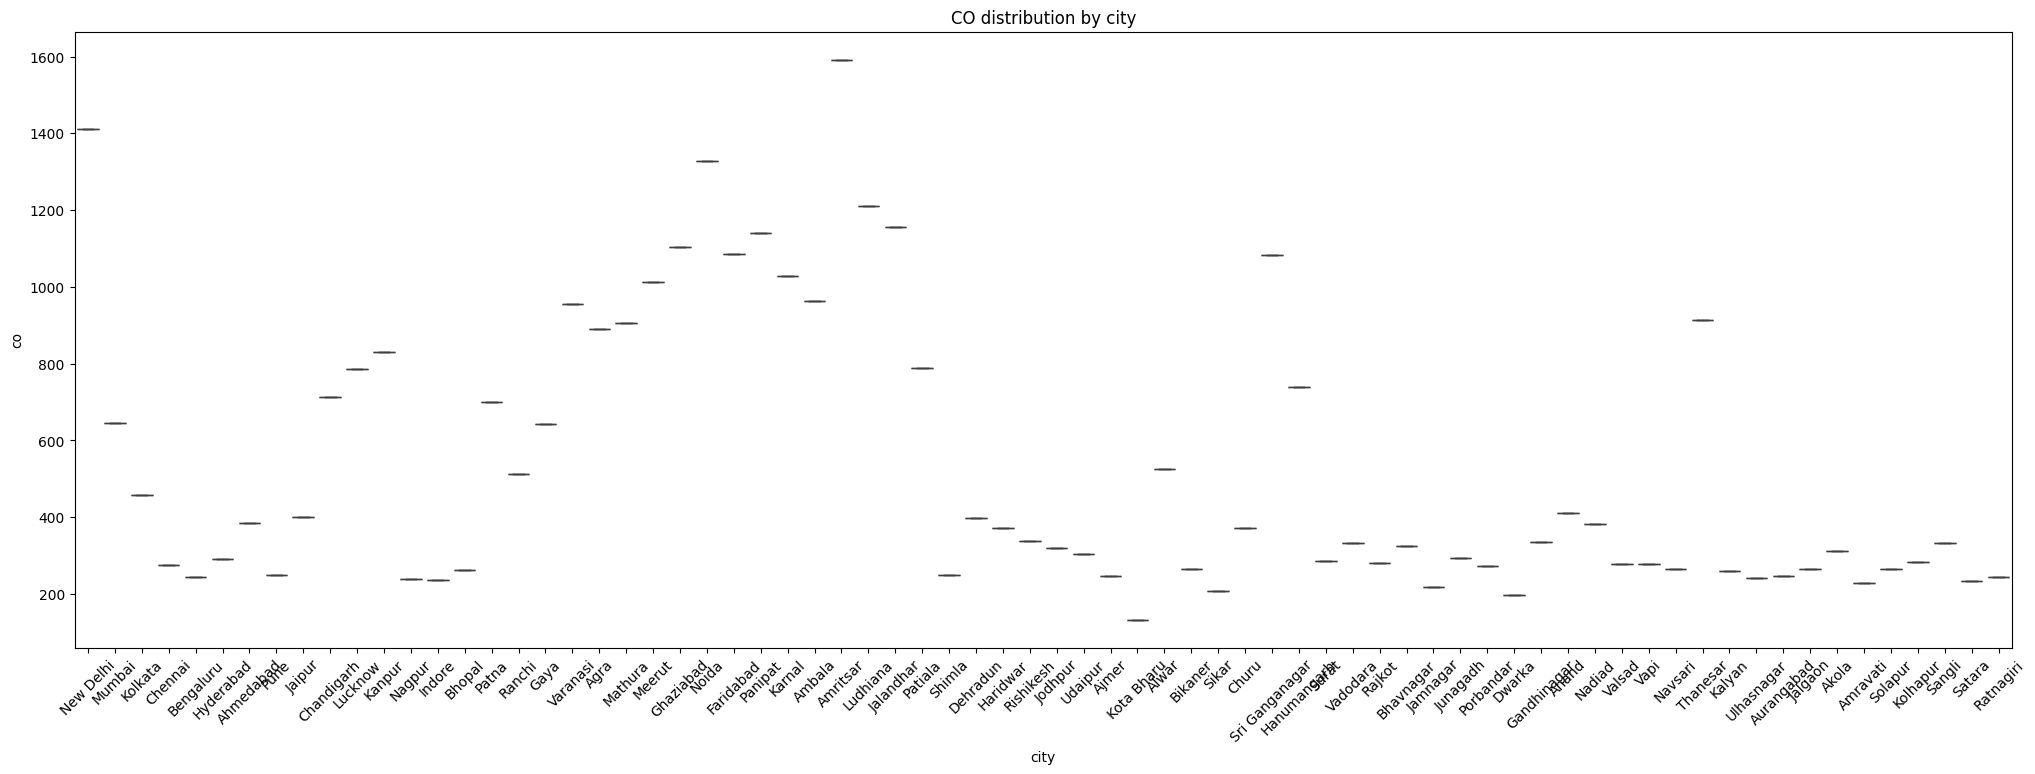

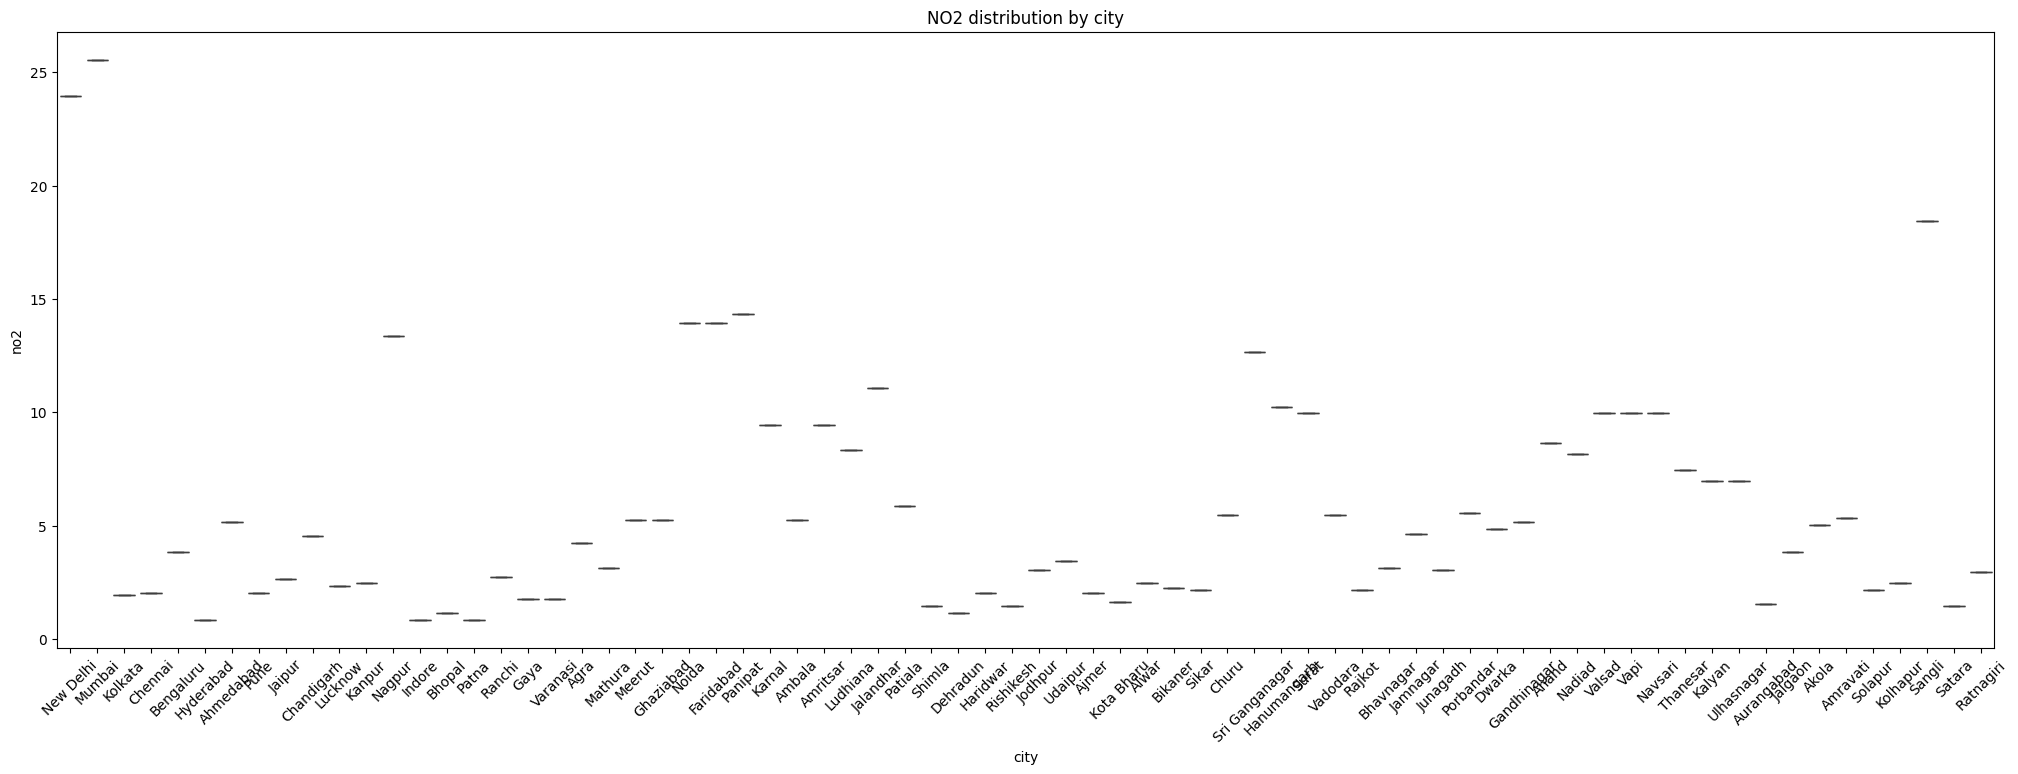

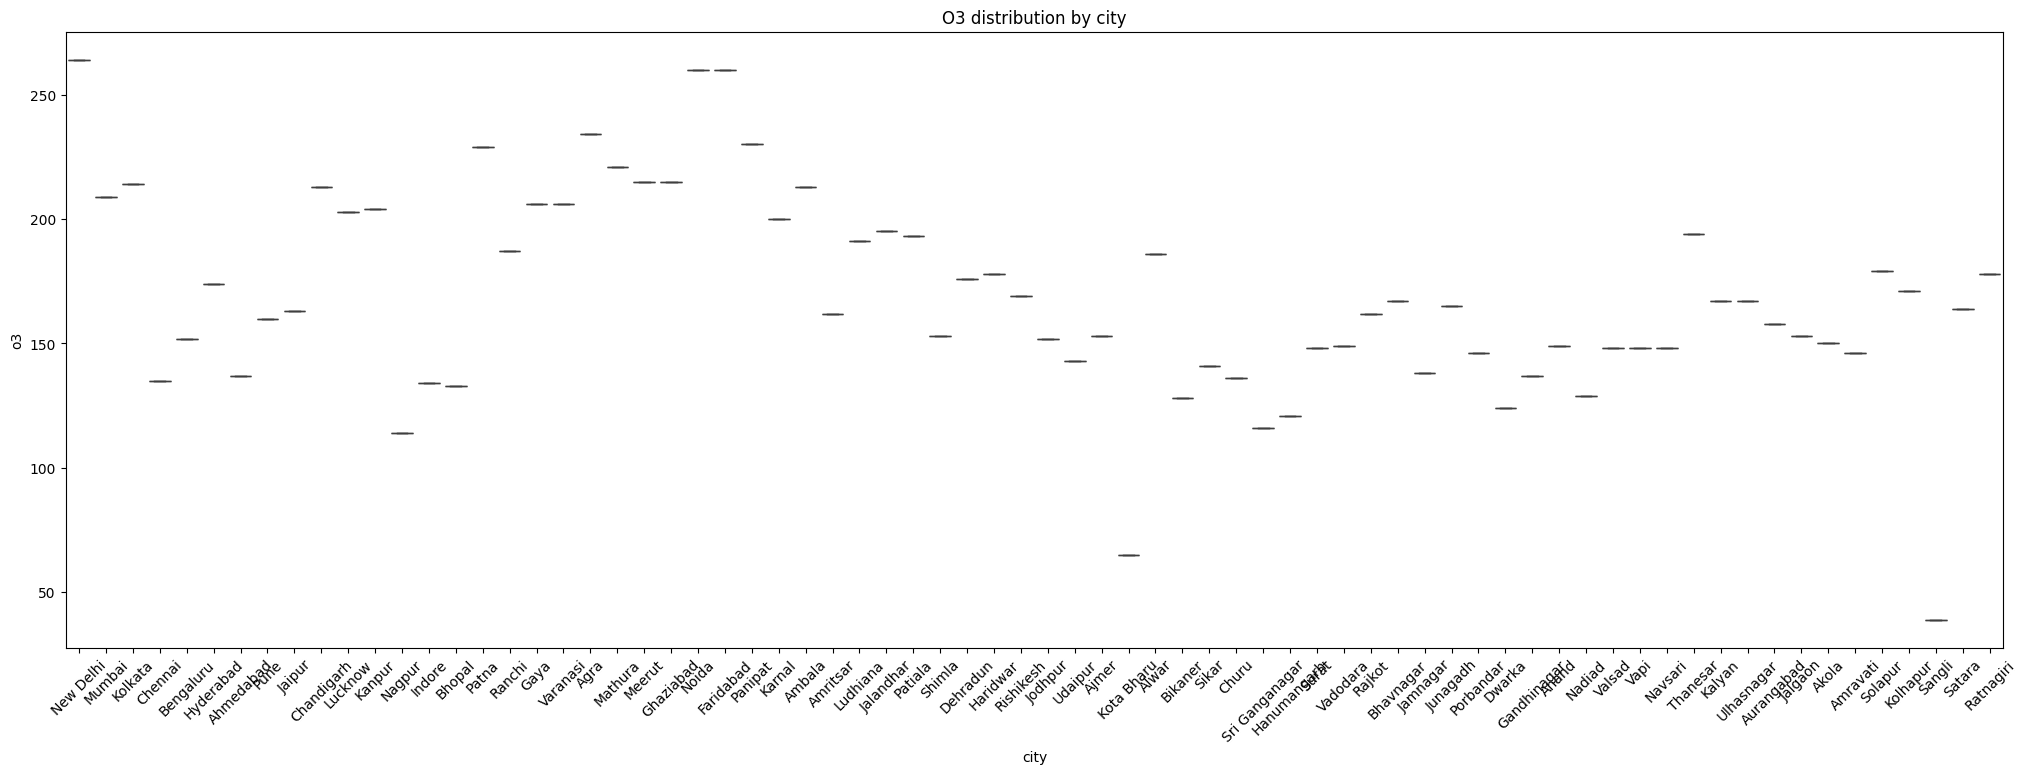

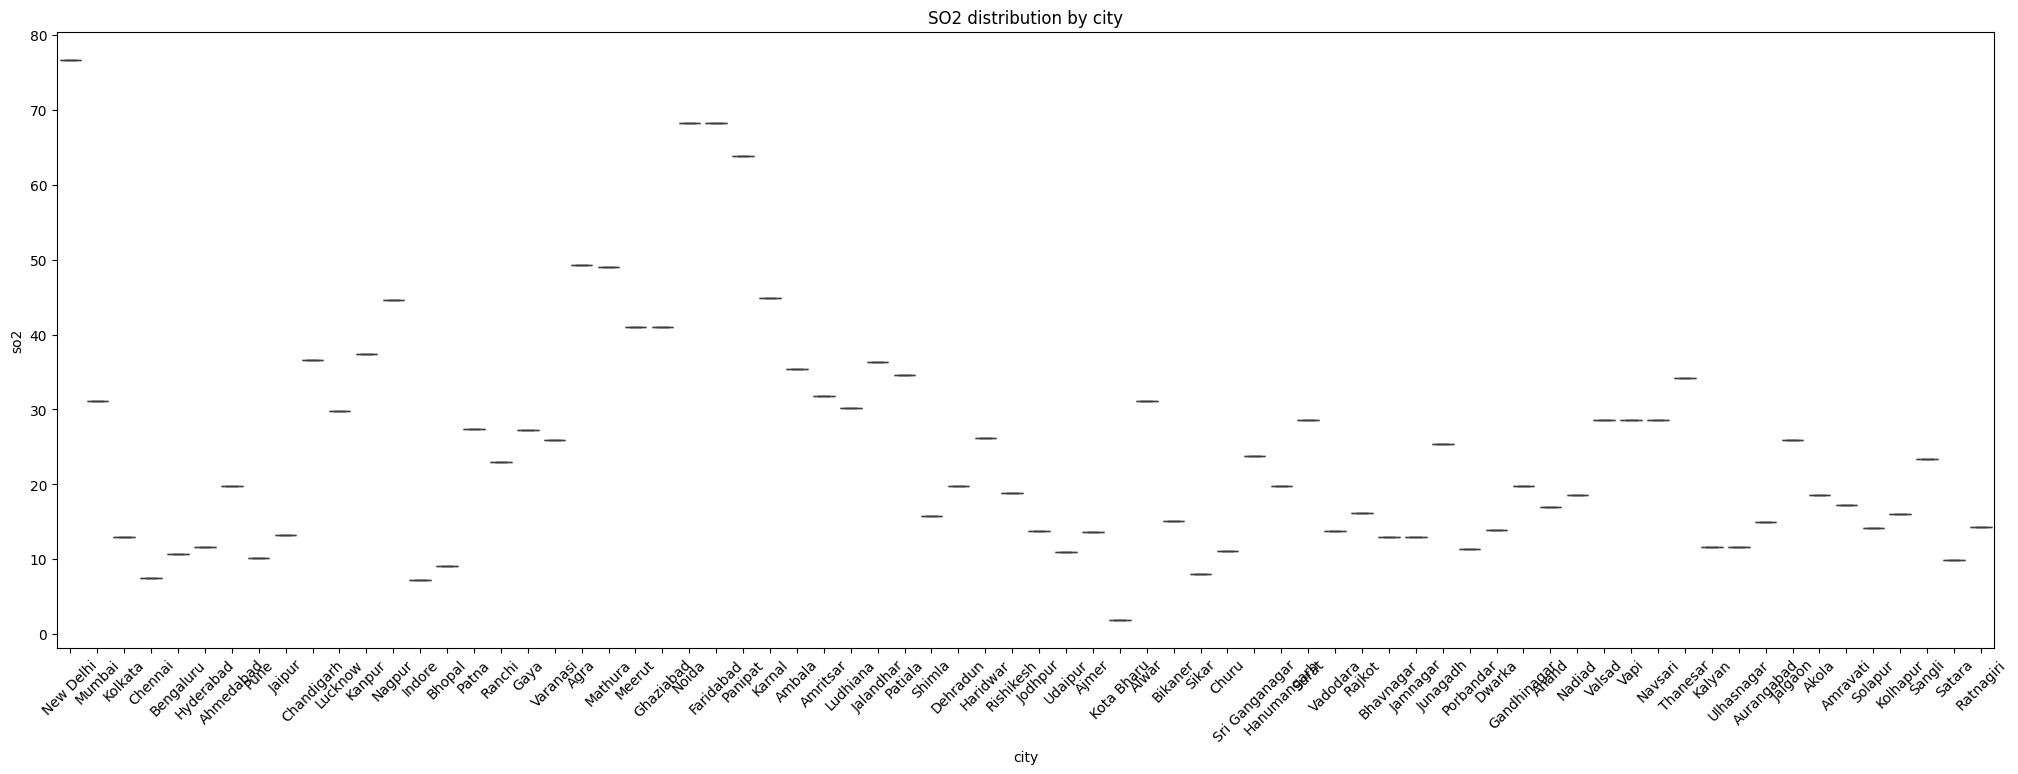

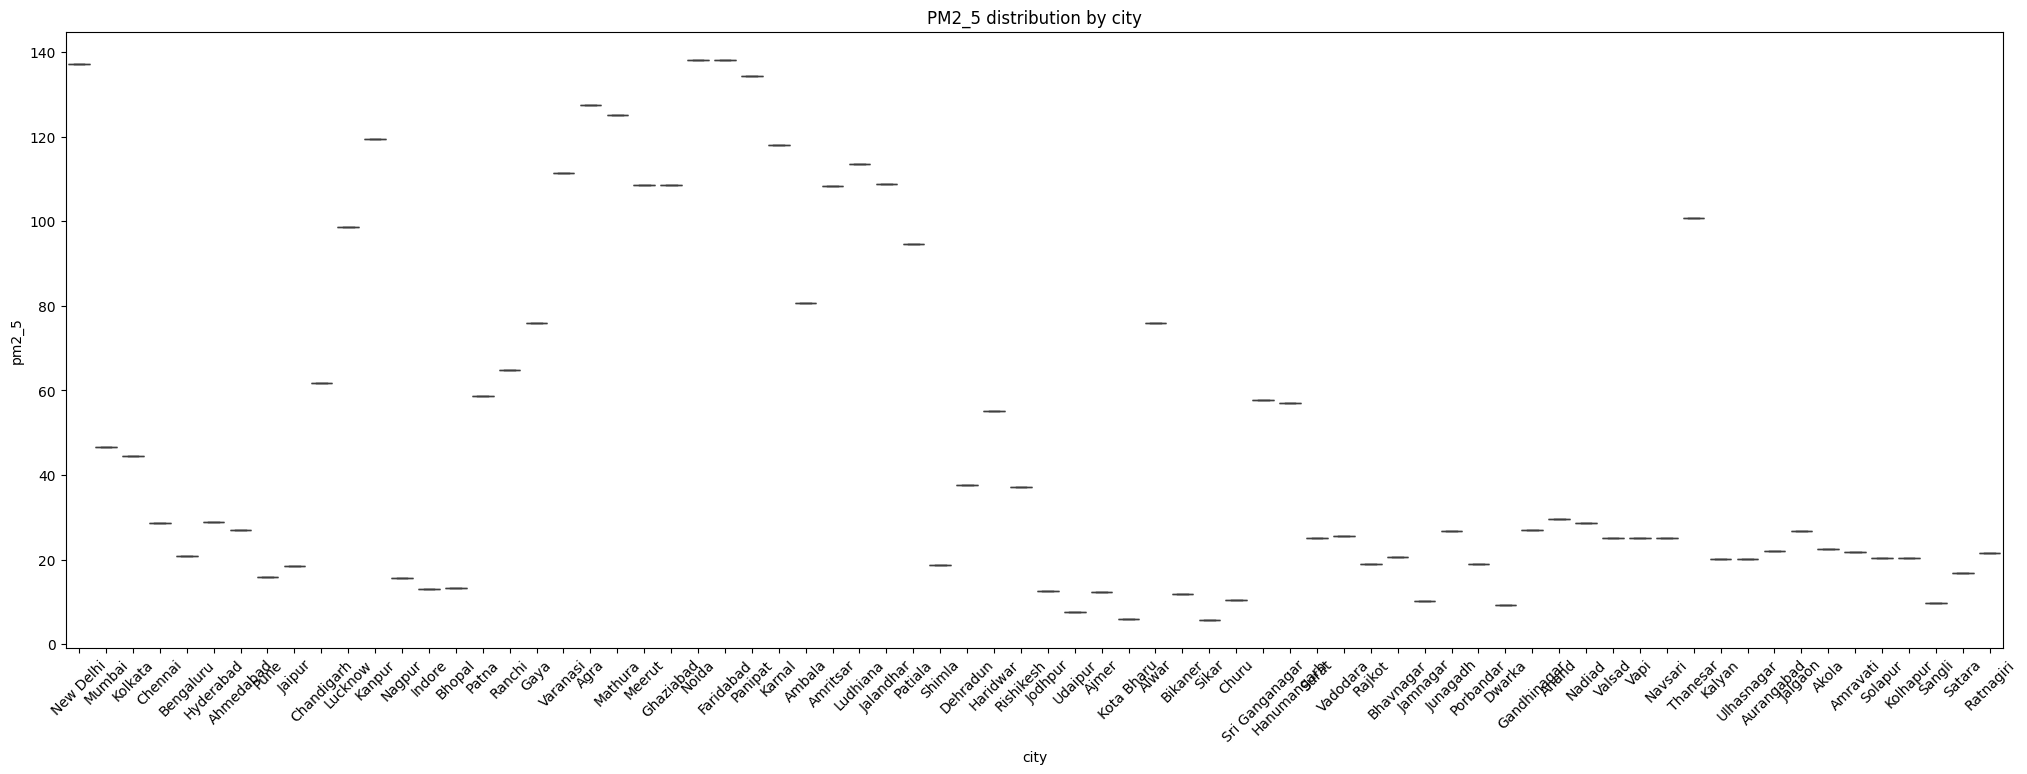

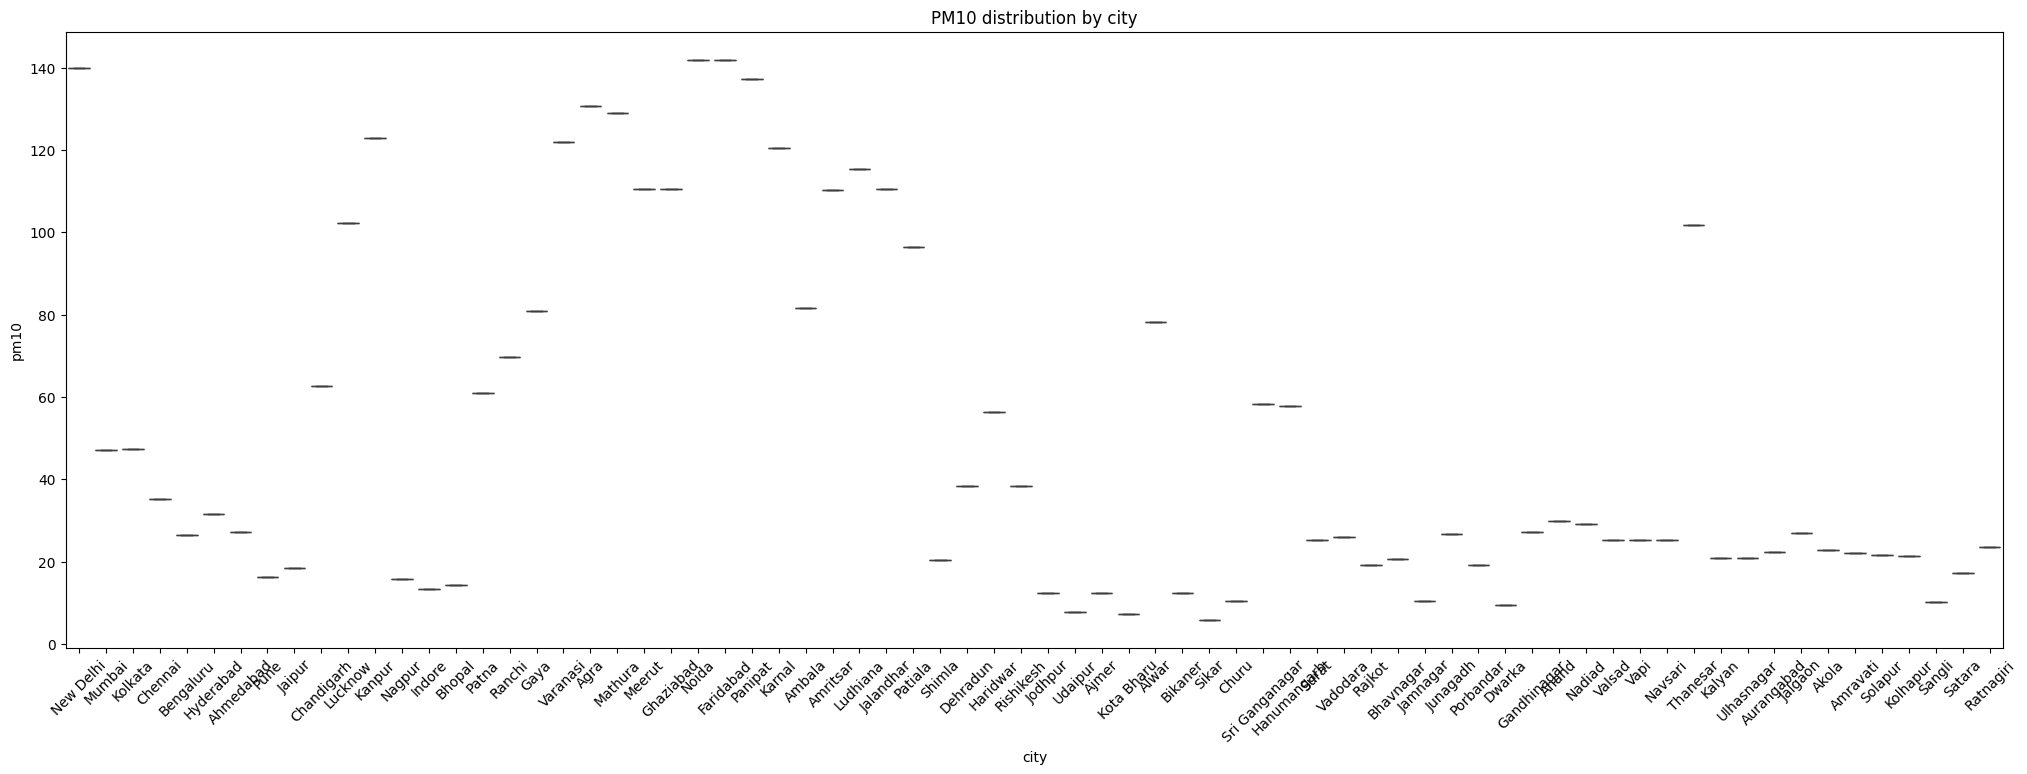

In [ ]:
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']

# Boxplots per city
for p in pollutants:
    plt.figure(figsize=(25,8))
    sns.boxplot(x='city', y=p, data=df)
    plt.title(f'{p.upper()} distribution by city')
    plt.xticks(rotation=45)
    plt.show()

**Correlation with weather**

This cell computes and visualizes the correlation matrix between selected numerical columns, including pollutants and weather parameters. A heatmap is generated to display the correlation coefficients, helping to identify relationships and dependencies between different variables.

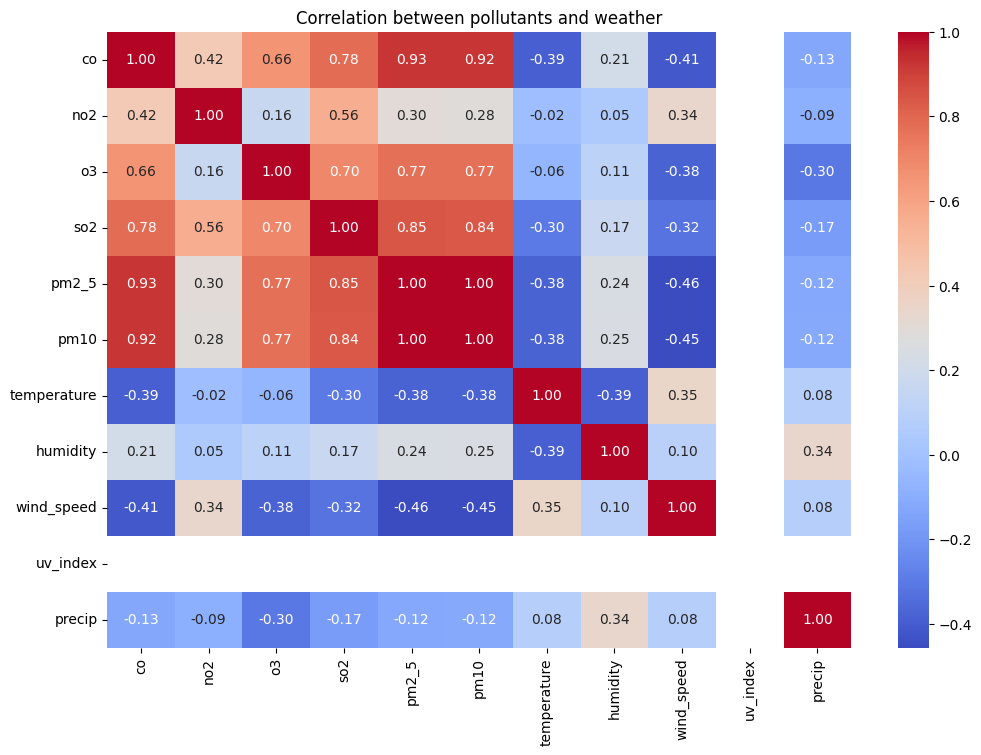

In [ ]:
# Select numeric columns
numeric_cols = pollutants + ['temperature', 'humidity', 'wind_speed', 'uv_index', 'precip']

corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between pollutants and weather")
plt.show()


**Average pollutant per city**

This cell calculates the average levels of each specified pollutant ('co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10') for each city. The resulting DataFrame, `avg_pollutants`, shows the mean concentration of each pollutant grouped by city.

In [ ]:
avg_pollutants = df.groupby('city')[pollutants].mean()
print(avg_pollutants)


                co   no2     o3    so2   pm2_5    pm10
city                                                  
Agra        889.85  4.25  234.0  49.25  127.55  130.75
Ahmedabad   385.85  5.15  137.0  19.85   26.95   27.25
Ajmer       247.85  2.05  153.0  13.65   12.25   12.25
Akola       312.85  5.05  150.0  18.65   22.55   22.75
Alwar       525.85  2.45  186.0  31.15   75.85   78.15
...            ...   ...    ...    ...     ...     ...
Ulhasnagar  240.85  6.95  167.0  11.65   20.15   20.75
Vadodara    332.85  5.45  149.0  13.75   25.45   25.95
Valsad      277.85  9.95  148.0  28.55   25.05   25.25
Vapi        277.85  9.95  148.0  28.55   25.05   25.25
Varanasi    955.85  1.75  206.0  25.95  111.45  121.95

[72 rows x 6 columns]


In [ ]:
# Get correlation matrix
corr = df[numeric_cols].corr()

# Optional: round for readability
corr_rounded = corr.round(2)
print(corr_rounded)


               co   no2    o3   so2  pm2_5  pm10  temperature  humidity  \
co           1.00  0.42  0.66  0.78   0.93  0.92        -0.39      0.21   
no2          0.42  1.00  0.16  0.56   0.30  0.28        -0.02      0.05   
o3           0.66  0.16  1.00  0.70   0.77  0.77        -0.06      0.11   
so2          0.78  0.56  0.70  1.00   0.85  0.84        -0.30      0.17   
pm2_5        0.93  0.30  0.77  0.85   1.00  1.00        -0.38      0.24   
pm10         0.92  0.28  0.77  0.84   1.00  1.00        -0.38      0.25   
temperature -0.39 -0.02 -0.06 -0.30  -0.38 -0.38         1.00     -0.39   
humidity     0.21  0.05  0.11  0.17   0.24  0.25        -0.39      1.00   
wind_speed  -0.41  0.34 -0.38 -0.32  -0.46 -0.45         0.35      0.10   
uv_index      NaN   NaN   NaN   NaN    NaN   NaN          NaN       NaN   
precip      -0.13 -0.09 -0.30 -0.17  -0.12 -0.12         0.08      0.34   

             wind_speed  uv_index  precip  
co                -0.41       NaN   -0.13  
no2        

**Simple hypothesis test**

This cell calculates the Pearson correlation matrix for the numeric columns and then rounds the correlation coefficients to two decimal places for better readability. This provides a clear overview of the linear relationships between the selected pollutant and weather variables.

In [ ]:
from scipy.stats import pearsonr

# Correlation coefficient and p-value
r, p = pearsonr(df['pm2_5'], df['wind_speed'])
print(f"Pearson r = {r:.2f}, p-value = {p:.3f}")


Pearson r = -0.46, p-value = 0.000


The last cell performs a simple hypothesis test using Pearson's correlation coefficient to examine the linear relationship between 'pm2_5' levels and 'wind_speed'. The output includes:
- **Pearson r**: The correlation coefficient, indicating the strength and direction of the linear relationship.
- **p-value**: The probability of observing such a correlation if no actual relationship exists. A small p-value (typically < 0.05) suggests a statistically significant relationship.